<a href="https://colab.research.google.com/github/Arsh-e-Barin-Khurshid/CodexCue-Software-Solutions-Task-3-Hyperparameter-Tuning-of-ML-Models-ML/blob/main/Hyperparameter_Tuning_of_ML_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Wine Quality***

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the dataset
data = pd.read_csv('/content/WineQT.csv')

In [ ]:
# Data preprocessing
X = data.drop('quality', axis=1)  # Features (all columns except 'quality')
y = data['quality']  # Target variable (wine quality)


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature scaling (standardize the data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize the RandomForest Classifier
rf = RandomForestClassifier(random_state=42)

In [ ]:
# ----------------------- Grid Search -----------------------
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Implement GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [ ]:
# Get the best parameters and evaluate the model
print("Best parameters from Grid Search: ", grid_search.best_params_)
best_grid_model = grid_search.best_estimator_
y_pred_grid = best_grid_model.predict(X_test)
print("Grid Search Accuracy: ", accuracy_score(y_test, y_pred_grid))

Best parameters from Grid Search:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Grid Search Accuracy:  0.6899563318777293


In [ ]:
# ----------------------- Random Search -----------------------
# Define the hyperparameter distribution
param_dist = {
    'n_estimators': [int(x) for x in range(50, 301, 50)],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

In [ ]:
# Implement RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=100, cv=5, random_state=42, n_jobs=-1, verbose=2)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   random_state=42, verbose=2)

In [ ]:
# Get the best parameters and evaluate the model
print("Best parameters from Random Search: ", random_search.best_params_)
best_random_model = random_search.best_estimator_
y_pred_random = best_random_model.predict(X_test)
print("Random Search Accuracy: ", accuracy_score(y_test, y_pred_random))

Best parameters from Random Search:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Random Search Accuracy:  0.6899563318777293


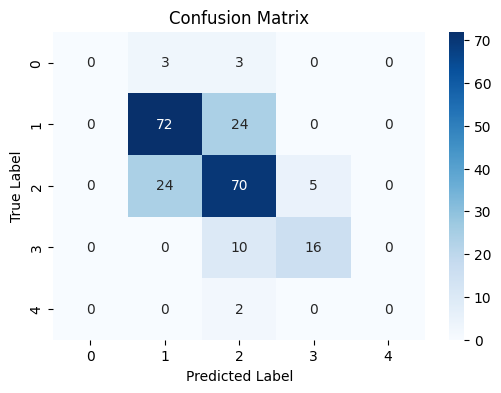

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt  # This was missing
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix code
cm = confusion_matrix(y_test, y_pred_grid)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


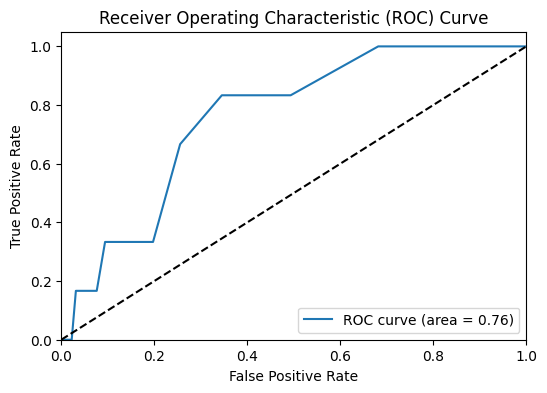

In [18]:
# ROC Curve and AUC
from sklearn.metrics import roc_curve, auc

y_prob = best_grid_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=best_grid_model.classes_[1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')  # Corrected line
plt.legend(loc="lower right")
plt.show()


<ipython-input-20-dbac7384a36c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[indices], y=X.columns[indices], palette='viridis')


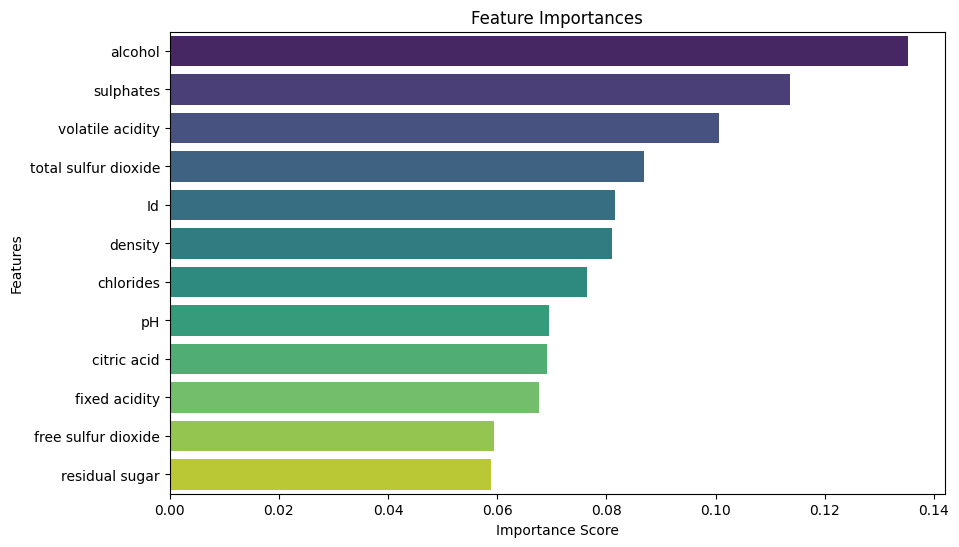

In [20]:
# Import necessary library
import numpy as np  # Missing numpy import

# Feature Importance
feature_importances = best_grid_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[indices], y=X.columns[indices], palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


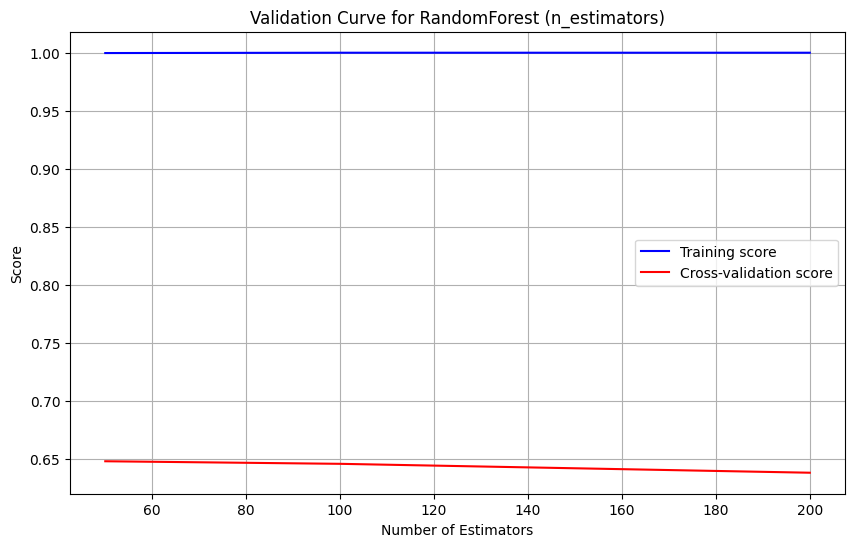

In [22]:
# Import necessary function
from sklearn.model_selection import validation_curve

# Validation Curve: Exploring how changing hyperparameters affects model performance
train_scores, test_scores = validation_curve(
    RandomForestClassifier(), X_train, y_train, param_name="n_estimators",
    param_range=param_grid['n_estimators'], cv=5, scoring="accuracy", n_jobs=-1
)

mean_train_scores = np.mean(train_scores, axis=1)
mean_test_scores = np.mean(test_scores, axis=1)

plt.figure(figsize=(10,6))
plt.plot(param_grid['n_estimators'], mean_train_scores, label="Training score", color="blue")
plt.plot(param_grid['n_estimators'], mean_test_scores, label="Cross-validation score", color="red")
plt.title('Validation Curve for RandomForest (n_estimators)')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.legend(loc="best")
plt.grid()
plt.show()


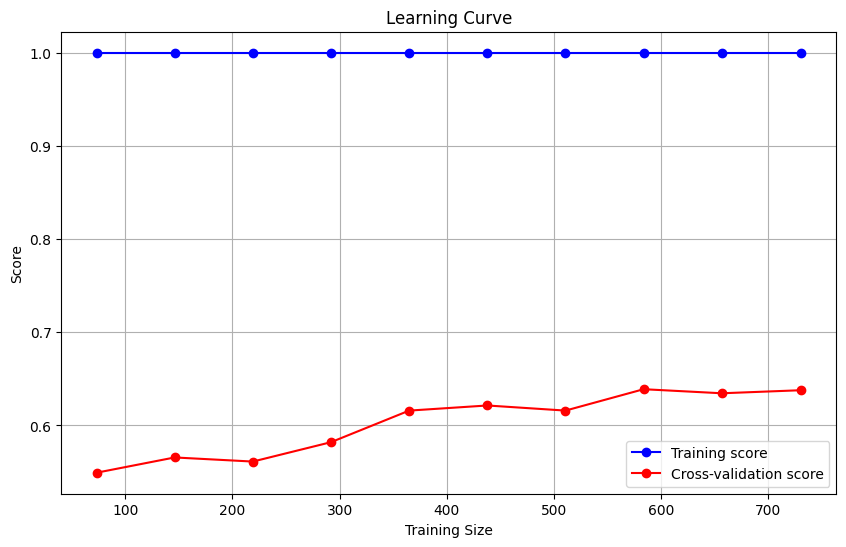

In [24]:
# Import necessary functions
from sklearn.model_selection import learning_curve
import numpy as np  # Make sure numpy is imported

# Learning Curve: Checking how performance evolves with more training data
train_sizes, train_scores, test_scores = learning_curve(
    RandomForestClassifier(**grid_search.best_params_), X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate the mean of the train and test scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plotting the learning curve
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="red", label="Cross-validation score")
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc="best")
plt.grid()
plt.show()


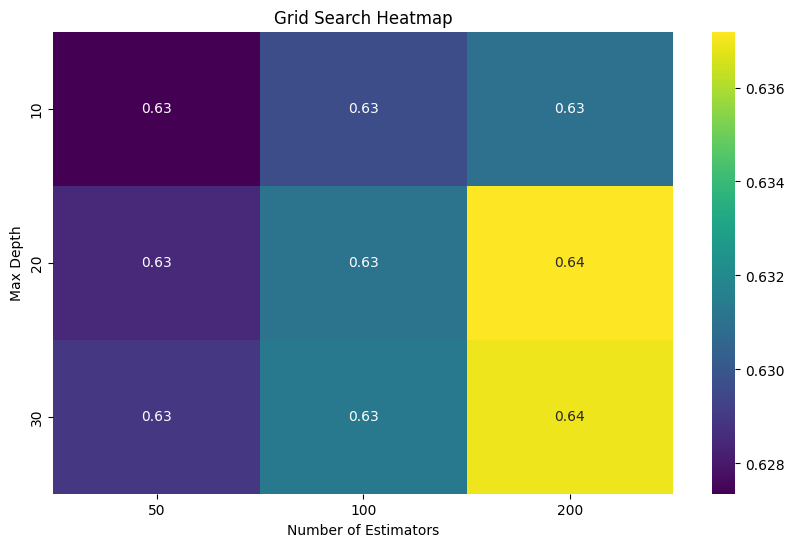

In [25]:
# Heatmap of Hyperparameters vs. Performance for Grid Search
results = pd.DataFrame(grid_search.cv_results_)
pivot_table = results.pivot_table(index='param_max_depth', columns='param_n_estimators', values='mean_test_score')
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, cmap='viridis')
plt.title('Grid Search Heatmap')
plt.xlabel('Number of Estimators')
plt.ylabel('Max Depth')
plt.show()

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score

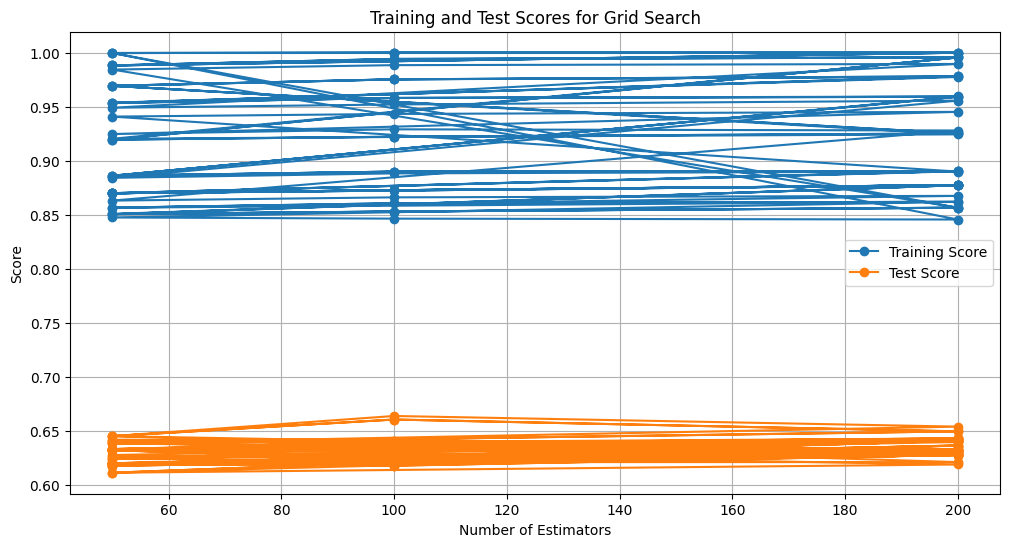

In [28]:
print(results.columns)
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Implement GridSearchCV with return_train_score=True
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, return_train_score=True)
grid_search.fit(X_train, y_train)

# Get results and inspect columns
results = pd.DataFrame(grid_search.cv_results_)
print(results.columns)
plt.figure(figsize=(12,6))
plt.plot(results['param_n_estimators'], results['mean_train_score'], label='Training Score', marker='o')
plt.plot(results['param_n_estimators'], results['mean_test_score'], label='Test Score', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.title('Training and Test Scores for Grid Search')
plt.legend()
plt.grid()
plt.show()


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')


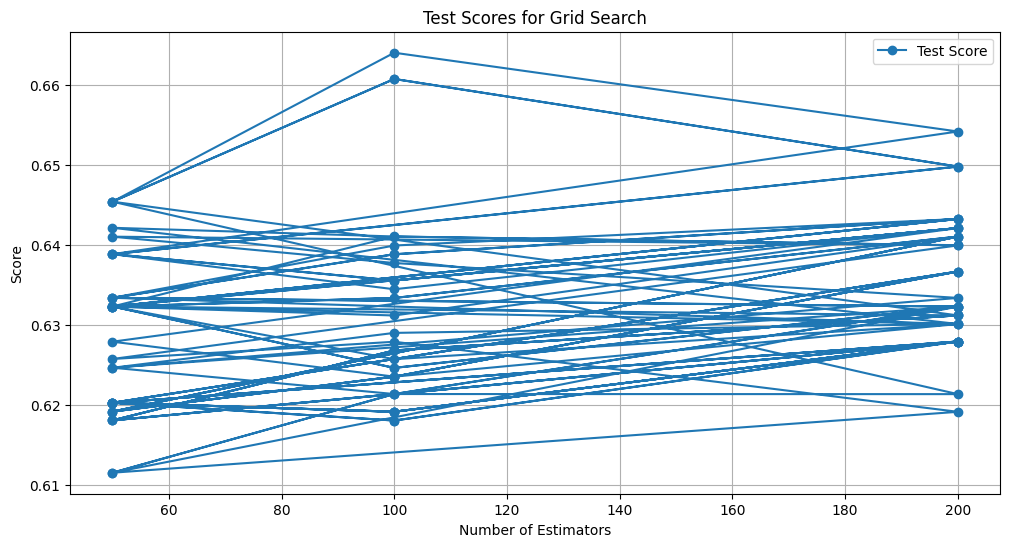

In [31]:
print(results.columns)
plt.figure(figsize=(12,6))
plt.plot(results['param_n_estimators'], results['mean_test_score'], label='Test Score', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.title('Test Scores for Grid Search')
plt.legend()
plt.grid()
plt.show()

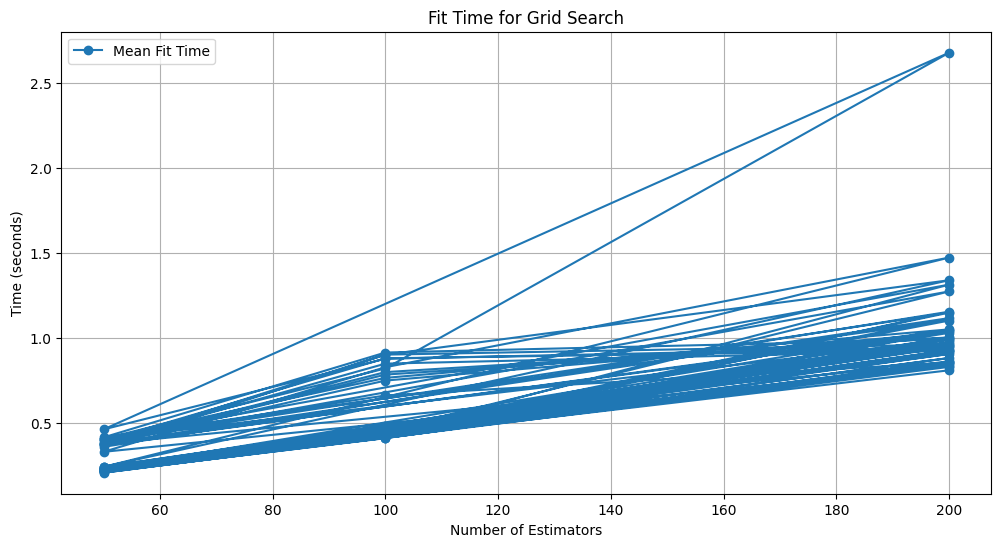

In [33]:
plt.figure(figsize=(12,6))
plt.plot(results['param_n_estimators'], results['mean_fit_time'], label='Mean Fit Time', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Time (seconds)')
plt.title('Fit Time for Grid Search')
plt.legend()
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


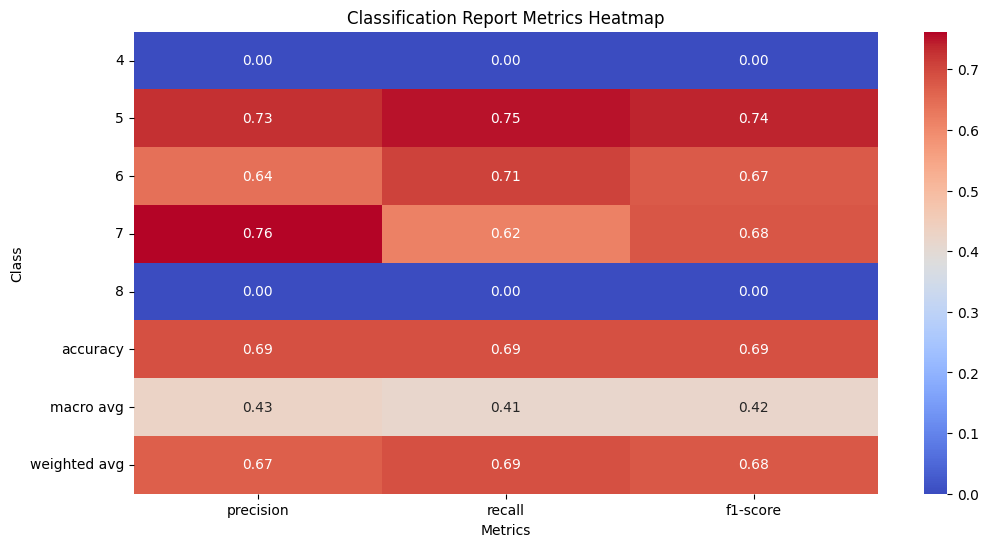

In [35]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Assuming y_test and y_pred_grid are defined
classification_rep = classification_report(y_test, y_pred_grid, output_dict=True)
metrics_df = pd.DataFrame(classification_rep).transpose()

plt.figure(figsize=(12,6))
sns.heatmap(metrics_df[['precision', 'recall', 'f1-score']], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Classification Report Metrics Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.show()


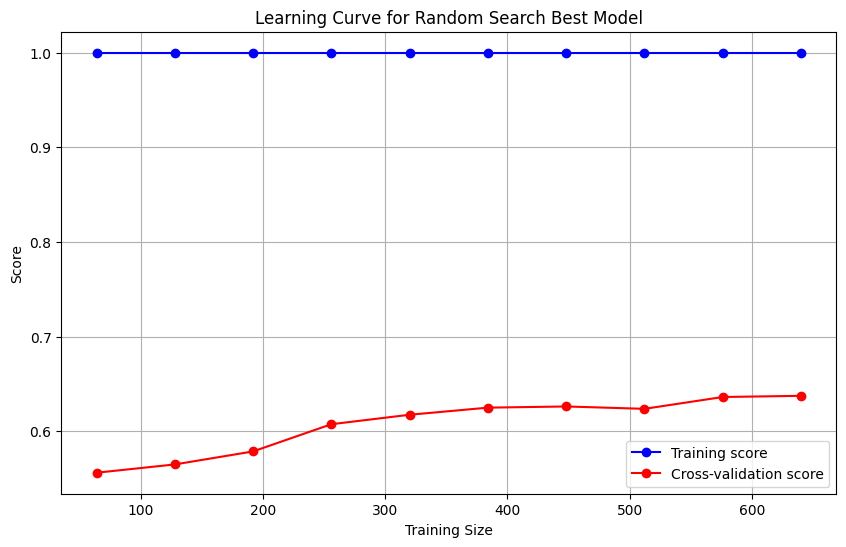

In [37]:
# Learning Curve for Random Search Best Model
train_sizes, train_scores, test_scores = learning_curve(
    RandomForestClassifier(**random_search.best_params_), X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="red", label="Cross-validation score")
plt.title('Learning Curve for Random Search Best Model')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc="best")
plt.grid()
plt.show()

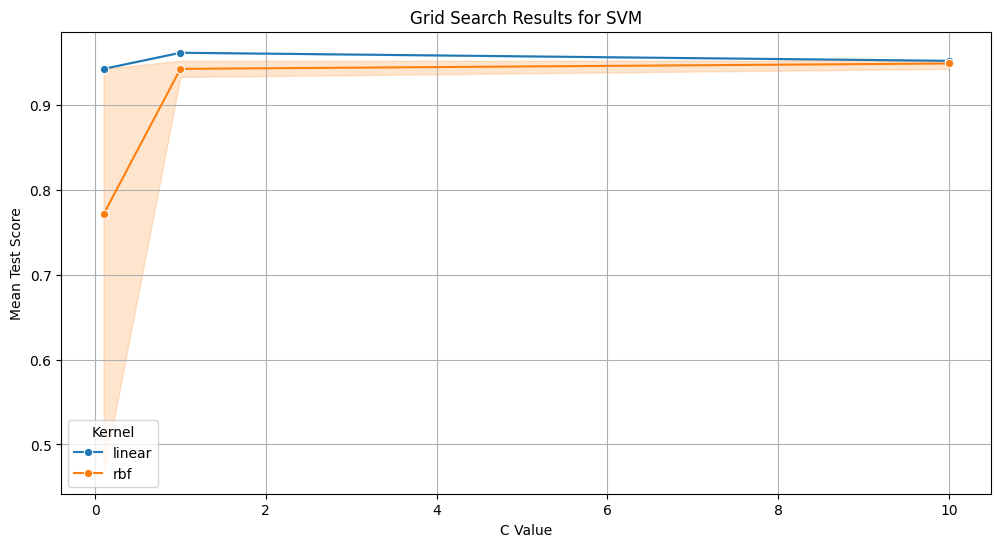

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load sample data
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.01, 0.1, 1]
}

# Initialize the model
svm = SVC()

# Initialize GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Extract results
results = pd.DataFrame(grid_search.cv_results_)

# Plot results
plt.figure(figsize=(12,6))
sns.lineplot(data=results, x='param_C', y='mean_test_score', hue='param_kernel', marker='o')
plt.xlabel('C Value')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results for SVM')
plt.legend(title='Kernel')
plt.grid(True)
plt.show()


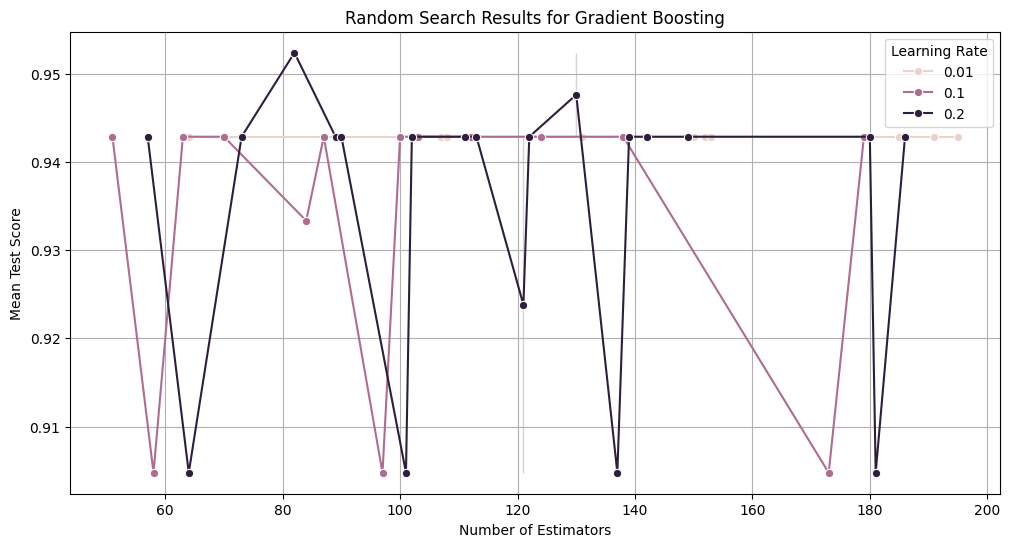

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load sample data
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for RandomizedSearch
param_distributions = {
    'n_estimators': randint(50, 200),
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': randint(3, 10)
}

# Initialize the model
gb = GradientBoostingClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(gb, param_distributions, n_iter=50, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Extract results
results = pd.DataFrame(random_search.cv_results_)

# Plot results
plt.figure(figsize=(12,6))
sns.lineplot(data=results, x='param_n_estimators', y='mean_test_score', hue='param_learning_rate', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.title('Random Search Results for Gradient Boosting')
plt.legend(title='Learning Rate')
plt.grid(True)
plt.show()


In [43]:
pip install bayesian-optimization


In [44]:
pip install seaborn


In [47]:
print(results_df.columns)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from bayes_opt import BayesianOptimization
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import seaborn as sns

# Load sample data
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the function to optimize
def xgb_evaluate(max_depth, learning_rate, n_estimators):
    model = XGBClassifier(max_depth=int(max_depth), learning_rate=learning_rate, n_estimators=int(n_estimators))
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    return score

# Define the parameter bounds
pbounds = {
    'max_depth': (3, 10),
    'learning_rate': (0.01, 0.2),
    'n_estimators': (50, 200)
}

# Initialize Bayesian Optimization
optimizer = BayesianOptimization(f=xgb_evaluate, pbounds=pbounds, random_state=42)
optimizer.maximize(init_points=5, n_iter=25)

# Extract results
xgb_results = optimizer.res
results_df = pd.DataFrame(xgb_results)

# Print column names for verification
print("Column names in results_df:", results_df.columns)

# Check the actual column names
print(results_df.head())

# Assuming columns 'params_max_depth', 'params_learning_rate', and 'target' exist
try:
    # Pivot the results DataFrame
    results_pivot = results_df.pivot_table(index='params_max_depth', columns='params_learning_rate', values='target')

    # Plot results
    plt.figure(figsize=(12,6))
    sns.heatmap(results_pivot, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Bayesian Optimization Results for XGBoost')
    plt.xlabel('Learning Rate')
    plt.ylabel('Max Depth')
    plt.show()
except KeyError as e:
    print(f"KeyError: {e}")
    print("Available columns:", results_df.columns)


Index(['target', 'params'], dtype='object')
|   iter    |  target   | learni... | max_depth | n_esti... |
-------------------------------------------------------------
| 1         | 1.0       | 0.08116   | 9.655     | 159.8     |
| 2         | 1.0       | 0.1237    | 4.092     | 73.4      |
| 3         | 1.0       | 0.02104   | 9.063     | 140.2     |
| 4         | 1.0       | 0.1445    | 3.144     | 195.5     |
| 5         | 1.0       | 0.1682    | 4.486     | 77.27     |
| 6         | 1.0       | 0.08775   | 9.943     | 50.13     |
| 7         | 1.0       | 0.0304    | 9.977     | 199.9     |
| 8         | 1.0       | 0.1808    | 3.234     | 50.15     |
| 9         | 1.0       | 0.1842    | 3.519     | 199.9     |
| 10        | 1.0       | 0.01716   | 9.943     | 50.03     |
| 11        | 1.0       | 0.1307    | 3.302     | 199.9     |
| 12        | 1.0       | 0.01583   | 3.376     | 50.08     |
| 13        | 1.0       | 0.1342    | 9.997     | 199.7     |
| 14        | 1.0       | 

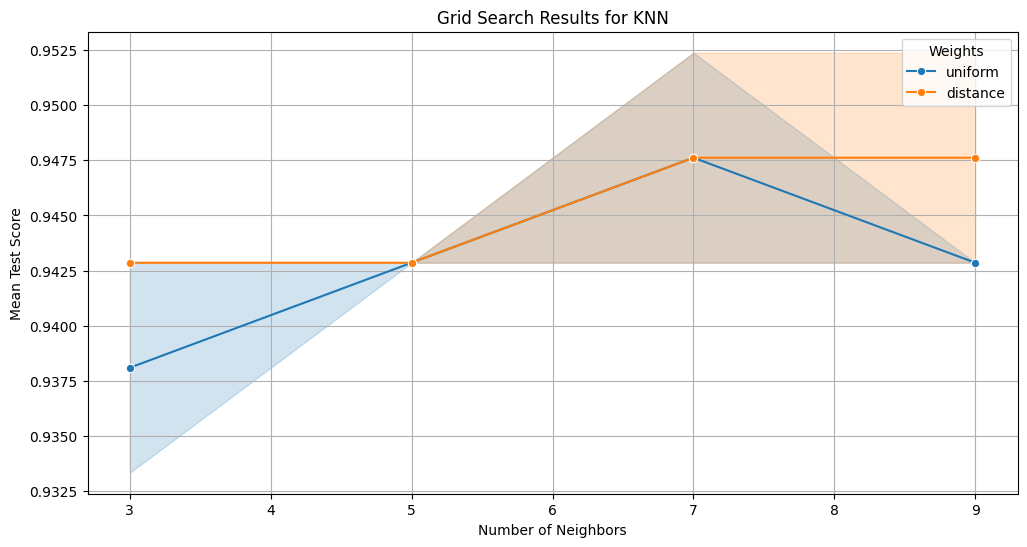

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load sample data
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Initialize the model
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Extract results
results = pd.DataFrame(grid_search.cv_results_)

# Plot results
plt.figure(figsize=(12,6))
sns.lineplot(data=results, x='param_n_neighbors', y='mean_test_score', hue='param_weights', marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results for KNN')
plt.legend(title='Weights')
plt.grid(True)
plt.show()


In [53]:
pip install tensorflow


In [55]:
pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.2 MB/s eta 0:00:00


Trial 10 Complete [00h 00m 03s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 00m 34s


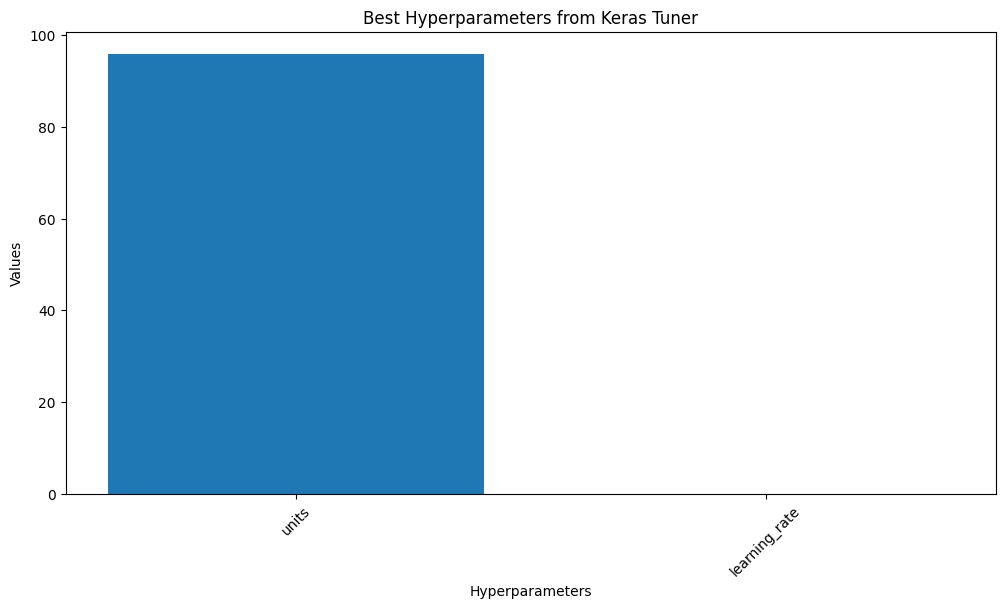

In [56]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from kerastuner import RandomSearch
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load sample data
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define model building function
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Initialize RandomSearch for Keras Tuner
tuner = RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=10,
                     executions_per_trial=1,
                     directory='my_dir',
                     project_name='intro_to_kt')

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)])

# Extract results
best_trial = tuner.oracle.get_best_trials(num_trials=1)[0]

# Plot best hyperparameters
best_params = best_trial.hyperparameters.values

plt.figure(figsize=(12,6))
plt.bar(best_params.keys(), best_params.values())
plt.xlabel('Hyperparameters')
plt.ylabel('Values')
plt.title('Best Hyperparameters from Keras Tuner')
plt.xticks(rotation=45)
plt.show()


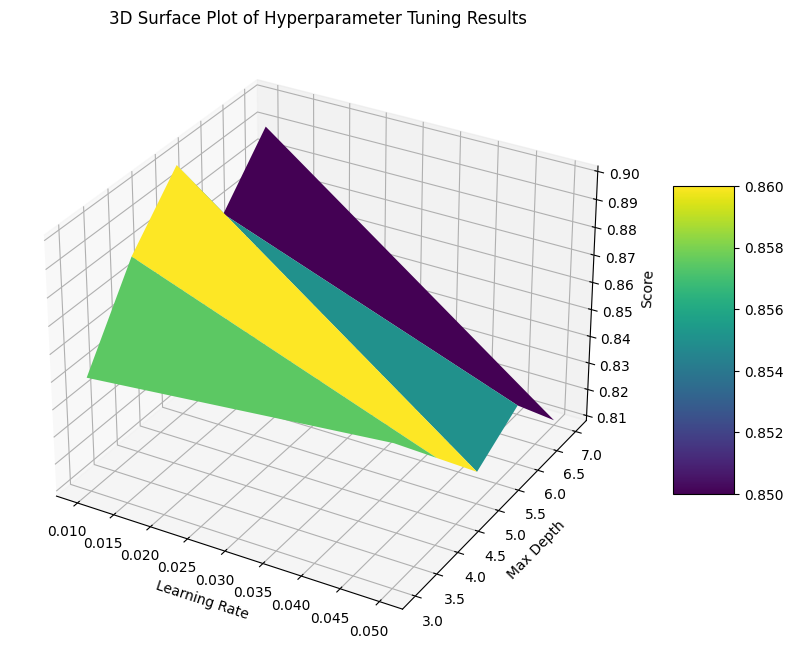

In [60]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

# Correct example data with matching lengths
results_df = pd.DataFrame({
    'param_max_depth': [3, 4, 5, 6, 7, 3, 4, 5, 6, 7],
    'param_learning_rate': [0.01, 0.01, 0.01, 0.01, 0.01, 0.05, 0.05, 0.05, 0.05, 0.05],
    'target': [0.85, 0.88, 0.90, 0.87, 0.89, 0.86, 0.84, 0.82, 0.83, 0.81]
})

# Pivot the DataFrame to fit 3D plot requirements
results_pivot = results_df.pivot(index='param_max_depth', columns='param_learning_rate', values='target')

# Create the 3D surface plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define the grid for the surface plot
X, Y = np.meshgrid(results_pivot.columns, results_pivot.index)
Z = results_pivot.values

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Max Depth')
ax.set_zlabel('Score')
ax.set_title('3D Surface Plot of Hyperparameter Tuning Results')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.show()


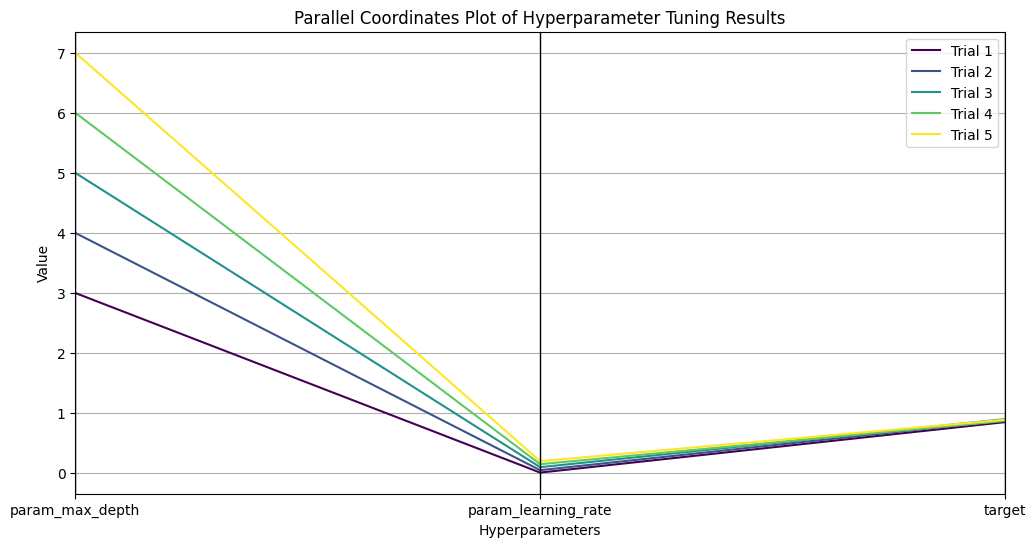

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import parallel_coordinates

# Example data (replace this with your actual results DataFrame)
results_df = pd.DataFrame({
    'param_max_depth': [3, 4, 5, 6, 7],
    'param_learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'target': [0.85, 0.88, 0.90, 0.87, 0.89],
    'trial': ['Trial 1', 'Trial 2', 'Trial 3', 'Trial 4', 'Trial 5']  # Use this for color coding
})

# Plot parallel coordinates
plt.figure(figsize=(12, 6))
parallel_coordinates(results_df, 'trial', cols=['param_max_depth', 'param_learning_rate', 'target'], color=plt.cm.viridis(np.linspace(0, 1, len(results_df['trial'].unique()))))
plt.title('Parallel Coordinates Plot of Hyperparameter Tuning Results')
plt.xlabel('Hyperparameters')
plt.ylabel('Value')
plt.legend(loc='best')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


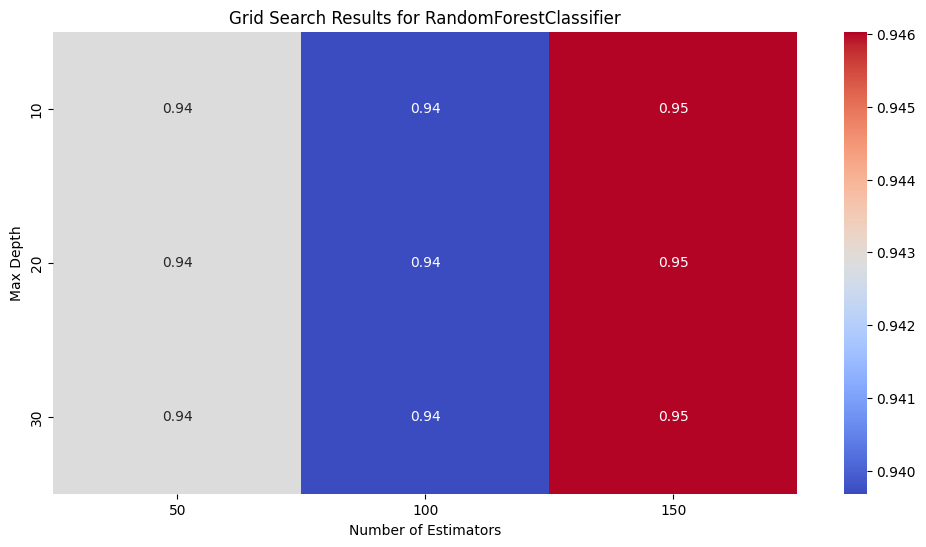

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 150}
Best Score: 0.9523809523809524


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_iris

# Load sample data
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model and hyperparameters
model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Extract results
results = pd.DataFrame(grid_search.cv_results_)

# Create a heatmap for visualization
plt.figure(figsize=(12, 6))
results_pivot = results.pivot_table(index='param_max_depth', columns='param_n_estimators', values='mean_test_score')
sns.heatmap(results_pivot, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Grid Search Results for RandomForestClassifier')
plt.xlabel('Number of Estimators')
plt.ylabel('Max Depth')
plt.show()

# Print best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
